In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers as layers
import matplotlib.pyplot as plt



In [10]:
data = list(np.linspace(0, 99, 100))
test_data = list(np.linspace(100, 119, 20))
print(data)
print(test_data)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]
[100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0]


In [11]:
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 


In [12]:
n_steps = 5
X, y = splitSequence(data, n_steps = 5)
X_test, y_test = splitSequence(test_data, n_steps)
for i in range(len(X)):
    print(X[i], y[i])
for i in range(len(X_test)):
    print(X_test[i], y_test[i])


[0. 1. 2. 3. 4.] 5.0
[1. 2. 3. 4. 5.] 6.0
[2. 3. 4. 5. 6.] 7.0
[3. 4. 5. 6. 7.] 8.0
[4. 5. 6. 7. 8.] 9.0
[5. 6. 7. 8. 9.] 10.0
[ 6.  7.  8.  9. 10.] 11.0
[ 7.  8.  9. 10. 11.] 12.0
[ 8.  9. 10. 11. 12.] 13.0
[ 9. 10. 11. 12. 13.] 14.0
[10. 11. 12. 13. 14.] 15.0
[11. 12. 13. 14. 15.] 16.0
[12. 13. 14. 15. 16.] 17.0
[13. 14. 15. 16. 17.] 18.0
[14. 15. 16. 17. 18.] 19.0
[15. 16. 17. 18. 19.] 20.0
[16. 17. 18. 19. 20.] 21.0
[17. 18. 19. 20. 21.] 22.0
[18. 19. 20. 21. 22.] 23.0
[19. 20. 21. 22. 23.] 24.0
[20. 21. 22. 23. 24.] 25.0
[21. 22. 23. 24. 25.] 26.0
[22. 23. 24. 25. 26.] 27.0
[23. 24. 25. 26. 27.] 28.0
[24. 25. 26. 27. 28.] 29.0
[25. 26. 27. 28. 29.] 30.0
[26. 27. 28. 29. 30.] 31.0
[27. 28. 29. 30. 31.] 32.0
[28. 29. 30. 31. 32.] 33.0
[29. 30. 31. 32. 33.] 34.0
[30. 31. 32. 33. 34.] 35.0
[31. 32. 33. 34. 35.] 36.0
[32. 33. 34. 35. 36.] 37.0
[33. 34. 35. 36. 37.] 38.0
[34. 35. 36. 37. 38.] 39.0
[35. 36. 37. 38. 39.] 40.0
[36. 37. 38. 39. 40.] 41.0
[37. 38. 39. 40. 41.] 42.0
[38. 39. 

In [13]:
print(y)


[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76.
 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94.
 95. 96. 97. 98. 99.]


In [14]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
print(X[0])
print(X_test[0])


[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
[[100.]
 [101.]
 [102.]
 [103.]
 [104.]]


In [15]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

2023-03-16 14:09:01.450062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-16 14:09:01.450733: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-16 14:09:01.450767: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2023-03-16 14:09:01.468806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [18]:
model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
3/3 [==============================] - 2s 39ms/step - loss: 3209.6338 - accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 1745.7987 - accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 650.8308 - accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 443.7880 - accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 44.6522 - accuracy: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 28.2336 - accuracy: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 42.1012 - accuracy: 0.0000e+00
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 5.9849 - accuracy: 0.0000e+00
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 11.6191 - accuracy: 0.0000e+00
Epoch 10/200
3/3 [==============================] - 0s 6ms/step - loss: 15.2

In [19]:
test_data = np.array([90, 100, 110, 120, 130])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 90],
        [100],
        [110],
        [120],
        [130]]])

1/1 [==============================] - 0s 354ms/step
[[104.98175 ]
 [105.97755 ]
 [106.972984]
 [107.968025]
 [108.962685]
 [109.95691 ]
 [110.9507  ]
 [111.94405 ]
 [112.936935]
 [113.92933 ]
 [114.921234]
 [115.91261 ]
 [116.90346 ]
 [117.89375 ]
 [118.883484]]


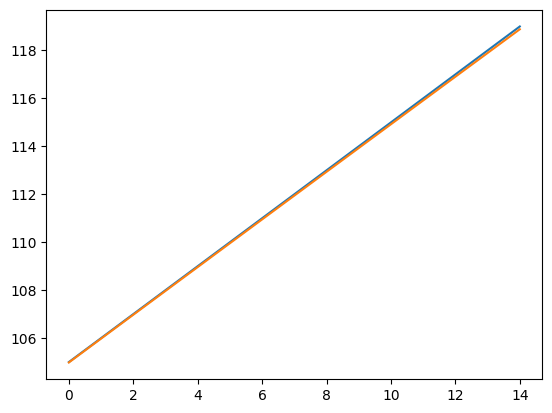

In [20]:
predictNextNumber = model.predict(X_test, verbose=1)
print(predictNextNumber)

fig, ax = plt.subplots()
ax.plot(y_test)
ax.plot(predictNextNumber)